# Import all the modules we will be using in the WebScraping project

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import re

# Scraping IMDB website to get top 500 Romance Comedy Dramas

In [2]:
# We will check if the site is allowing WebScraping by using requests module
# We are requesting to scrap data from imdb for Romance Comedy dramas sorted with number of votes
url = "https://www.imdb.com/search/title/?genres=comedy,romance&sort=num_votes,desc&explore=title_type,genres"
imdb = requests.get(url)
imdb

<Response [200]>

In [3]:
# As the response shows the imdb website is accepting WebScraping
# Now we will use BeautifulSoup to read this text in html format
imdb.text
BeautifulSoup(imdb.text)
soup = BeautifulSoup(imdb.text,"html.parser")

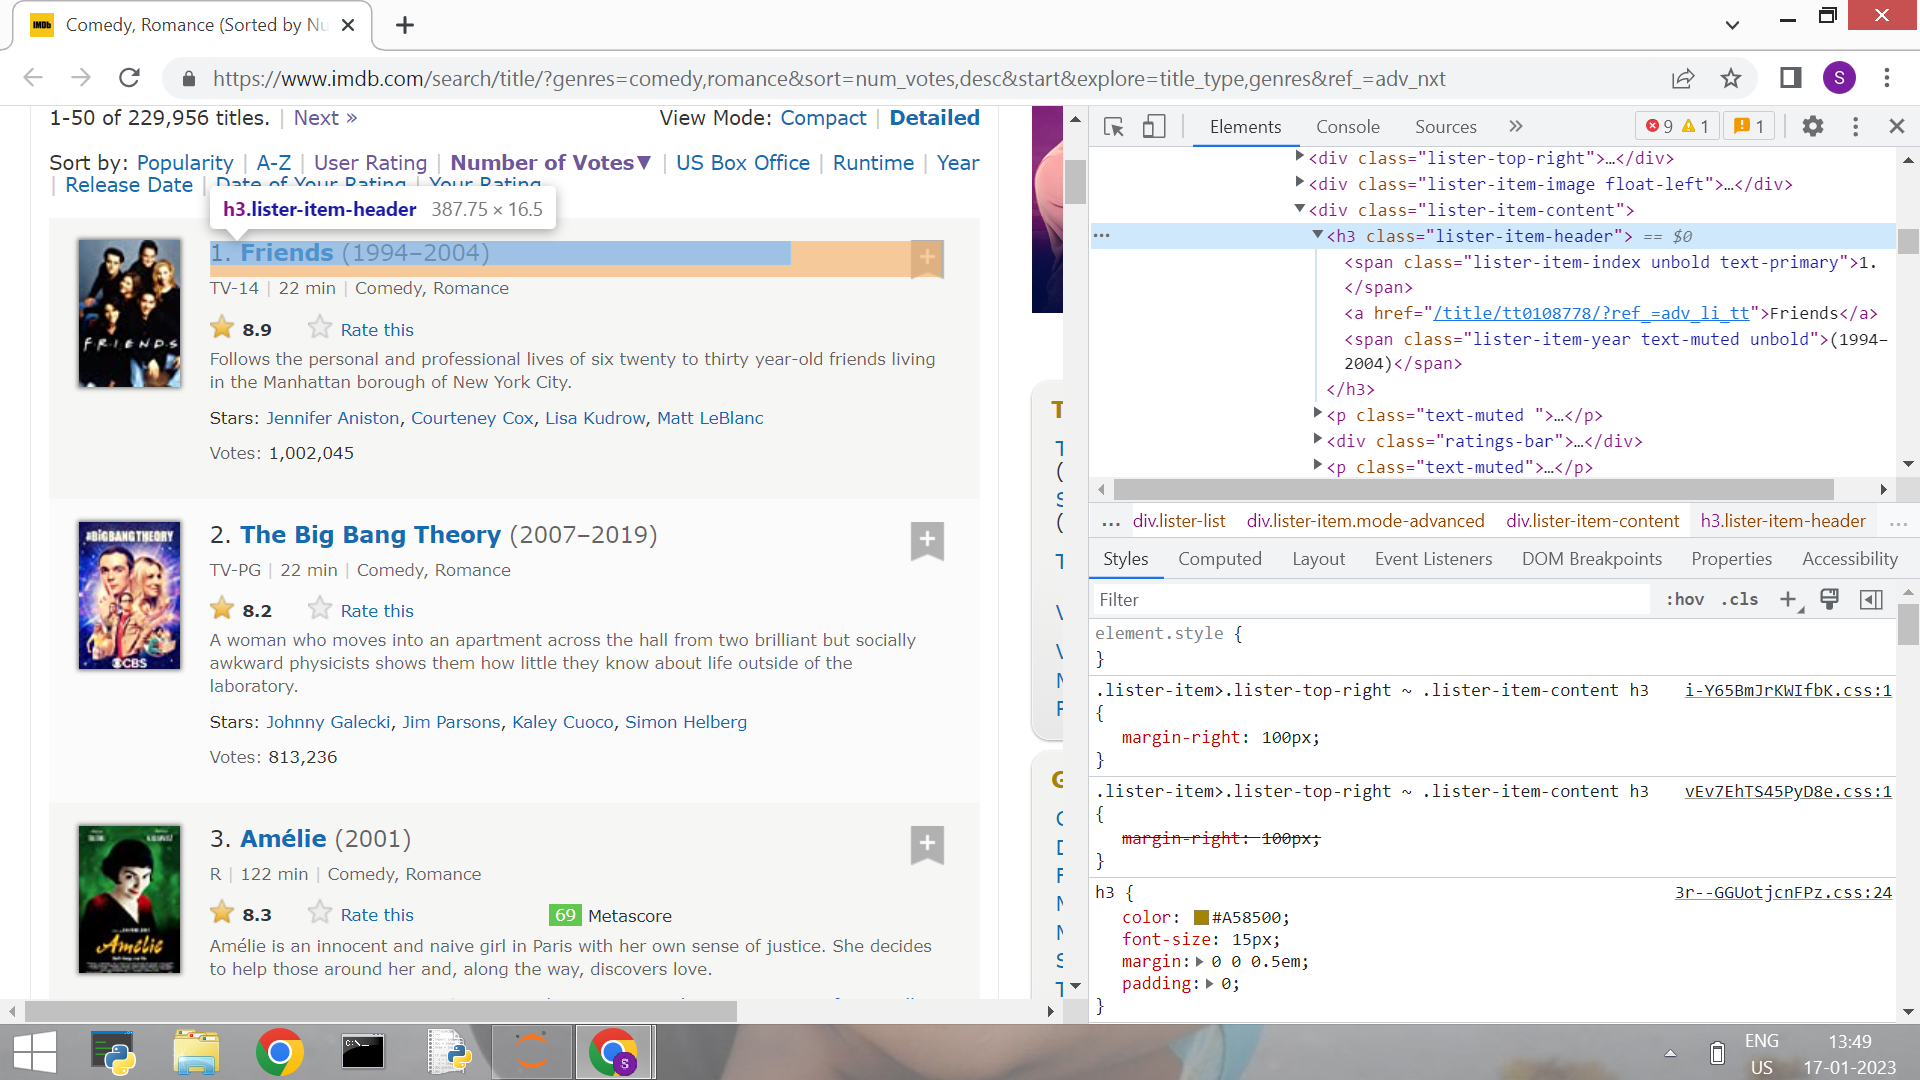

# Collecting different features of the Dramas

In [4]:
# First step is we will collect Title of the Drama
imdb=soup.find_all("h3",class_="lister-item-header")
imdb[0].text.split("\n")[2]

'Friends'

In [5]:
# To find all the Titles in page-1 we will use for loop
title=[]
for i in imdb:
    title.append(i.text.split("\n")[2])
print(title,len(title))

['Friends', 'The Big Bang Theory', "Le fabuleux destin d'Amélie Poulain", 'Silver Linings Playbook', 'La vita è bella', 'How I Met Your Mother', 'Shrek', 'Groundhog Day', 'La La Land', 'Crazy, Stupid, Love.', '(500) Days of Summer', 'Love Actually', 'Shrek 2', 'The Terminal', 'Tangled', 'The 40 Year Old Virgin', 'Modern Family', 'Scott Pilgrim vs. the World', 'Midnight in Paris', 'Aladdin', 'Easy A', 'Friends with Benefits', 'Knocked Up', 'Yes Man', 'Wedding Crashers', '50 First Dates', 'About Time', 'Moonrise Kingdom', '10 Things I Hate About You', 'Meet the Parents', 'Up in the Air', 'Thor: Love and Thunder', 'Click', 'The Proposal', '50/50', 'Pretty Woman', 'WandaVision', 'The Secret Life of Walter Mitty', 'Hitch', 'Notting Hill', "There's Something About Mary", 'Shrek the Third', 'Pitch Perfect', 'As Good as It Gets', 'The Holiday', 'Bridesmaids', 'Forgetting Sarah Marshall', 'Elf', 'Grease', 'The Graduate'] 50


In [6]:
# Next we will collect the year start and year end
# Here if it is only running in that year we will take the year end is year start

year_start=[]
year_end=[]
for i in imdb:
    a=i.text
    year_start.append(re.findall(r"\((\d{4})",a)[0])
for i in imdb:
    a=i.text
    if len(re.findall(r"\–(\d{4})",a))==0:
        year_end.append(re.findall(r"\((\d{4})",a)[0])
    elif len(re.findall(r"\–(\d{4})",a))>0:
        year_end.append(re.findall(r"\–(\d{4})",a)[0])
print("Year_start is: ",year_start,len(year_start))
print("----------------------")
print("Year_end is: ",year_end,len(year_end))

Year_start is:  ['1994', '2007', '2001', '2012', '1997', '2005', '2001', '1993', '2016', '2011', '2009', '2003', '2004', '2004', '2010', '2005', '2009', '2010', '2011', '1992', '2010', '2011', '2007', '2008', '2005', '2004', '2013', '2012', '1999', '2000', '2009', '2022', '2006', '2009', '2011', '1990', '2021', '2013', '2005', '1999', '1998', '2007', '2012', '1997', '2006', '2011', '2008', '2003', '1978', '1967'] 50
----------------------
Year_end is:  ['2004', '2019', '2001', '2012', '1997', '2014', '2001', '1993', '2016', '2011', '2009', '2003', '2004', '2004', '2010', '2005', '2020', '2010', '2011', '1992', '2010', '2011', '2007', '2008', '2005', '2004', '2013', '2012', '1999', '2000', '2009', '2022', '2006', '2009', '2011', '1990', '2021', '2013', '2005', '1999', '1998', '2007', '2012', '1997', '2006', '2011', '2008', '2003', '1978', '1967'] 50


In [7]:
# To get Certificates and runtime
certificate=[]
runtime=[]
for i in soup.find_all("p",class_="text-muted"):
    a=i.text
    b=re.findall("(.*)\W.*\W\d+\s?min",a)
    if b:
        certificate.append(b[0])
    else:
        certificate.append(np.nan)
certificates=certificate[::2]


for i in soup.find_all("span",class_="runtime"):
    runtime.append(i.text)
    
print("Certificate is: ",certificates,len(certificates))
print("--------------------")
print("Runtime is: ",runtime,len(runtime))


Certificate is:  ['13+', 'U', 'U', 'A', 'U', '15+', 'U', 'U', 'A', 'A', 'UA', 'A', 'U', 'U', 'U', 'UA', '12+', 'U', 'PG-13', 'U', 'A', 'A', '18', 'PG-13', 'UA', 'UA', '16', 'A', 'U', 'UA', 'R', 'UA', 'A', 'A', '18', 'A', '12+', 'UA', 'U', 'U', 'A', 'U', 'U', 'A', 'UA', 'UA 16+', 'UA', 'U', 'A', 'A'] 50
--------------------
Runtime is:  ['22 min', '22 min', '122 min', '122 min', '116 min', '22 min', '90 min', '101 min', '128 min', '118 min', '95 min', '135 min', '93 min', '128 min', '100 min', '116 min', '22 min', '112 min', '94 min', '90 min', '92 min', '109 min', '129 min', '104 min', '119 min', '99 min', '123 min', '94 min', '97 min', '108 min', '109 min', '118 min', '107 min', '108 min', '100 min', '119 min', '350 min', '114 min', '118 min', '124 min', '119 min', '93 min', '112 min', '139 min', '136 min', '125 min', '111 min', '97 min', '110 min', '106 min'] 50


In [8]:
# To find Votes and Gross
votes=[]
gross=[]
for i in soup.find_all("p",class_="sort-num_votes-visible"):
    a=i.text
    b=re.findall("Votes:\W(.*)",a)
    e=re.findall("Gross:\W(.*)",a)
    if e:
        gross.append(e[0])
    else:
        gross.append(np.nan)
    votes.append(b[0])
print("Votes: ",votes,len(votes))
print("----------------------")
print("Gross is : ",gross,len(gross))

Votes:  ['1,003,700', '814,328', '760,481', '713,756', '698,695', '688,533', '683,867', '636,497', '595,214', '525,659', '521,172', '499,411', '469,465', '464,516', '458,756', '442,711', '435,845', '431,238', '428,265', '424,989', '395,101', '373,467', '372,665', '366,490', '360,119', '359,936', '355,934', '353,098', '348,598', '339,224', '338,923', '337,555', '335,911', '332,996', '332,864', '330,293', '328,270', '321,235', '321,035', '317,839', '314,913', '311,612', '309,902', '302,248', '297,298', '295,024', '288,238', '284,132', '280,934', '276,047'] 50
----------------------
Gross is :  [nan, nan, '$33.23M', '$132.09M', '$57.60M', nan, '$267.67M', '$70.91M', '$151.10M', '$84.35M', '$32.39M', '$59.70M', '$436.47M', '$77.87M', '$200.82M', '$109.45M', nan, '$31.49M', '$56.82M', '$217.35M', '$58.40M', '$55.80M', '$148.73M', '$97.69M', '$209.22M', '$120.91M', '$15.32M', '$45.51M', '$38.18M', '$166.24M', '$83.82M', nan, '$137.36M', '$163.96M', '$35.01M', '$178.41M', nan, '$58.24M', '$17

In [9]:
# To Find Rating and Metascore
metascore=[]
rating=[]
for i in soup.find_all("div",class_="ratings-bar"):
    a=i.text.strip()
    b=re.findall("(\d+)\s*\WMetascore",a)
    if b:
        metascore.append(b[0])
    else:
        metascore.append(np.nan)
    c=re.findall("(.*)\W*Rate this",a)
    if c:
        rating.append(c[0])
    else:
        rating.append(np.nan)
print("Metascore: ",metascore,len(metascore))
print("----------------------")
print("Rating is : ",rating,len(rating))

Metascore:  [nan, nan, '69', '81', '59', nan, '84', '72', '94', '68', '76', '55', '75', '55', '71', '73', nan, '69', '81', '86', '72', '63', '85', '46', '64', '48', '55', '84', '70', '73', '83', '57', '45', '48', '72', '51', nan, '54', '58', '68', '69', '58', '66', '67', '52', '75', '67', '64', '70', '83'] 50
----------------------
Rating is :  ['8.9', '8.2', '8.3', '7.7', '8.6', '8.3', '7.9', '8.1', '8.0', '7.4', '7.7', '7.6', '7.3', '7.4', '7.7', '7.1', '8.5', '7.5', '7.7', '8.0', '7.0', '6.5', '6.9', '6.8', '7.0', '6.8', '7.8', '7.8', '7.3', '7.0', '7.4', '6.3', '6.4', '6.7', '7.6', '7.1', '7.9', '7.3', '6.6', '7.2', '7.1', '6.1', '7.1', '7.7', '6.9', '6.8', '7.1', '7.1', '7.2', '8.0'] 50


In [10]:
# To find the genre
genre=[]
for i in soup.find_all("span",class_="genre"):
    genre.append(i.text.replace("\n","").replace(" ",""))
print(genre,len(genre))

['Comedy,Romance', 'Comedy,Romance', 'Comedy,Romance', 'Comedy,Drama,Romance', 'Comedy,Drama,Romance', 'Comedy,Romance', 'Animation,Adventure,Comedy', 'Comedy,Drama,Fantasy', 'Comedy,Drama,Music', 'Comedy,Drama,Romance', 'Comedy,Drama,Romance', 'Comedy,Drama,Romance', 'Animation,Adventure,Comedy', 'Comedy,Drama,Romance', 'Animation,Adventure,Comedy', 'Comedy,Romance', 'Comedy,Drama,Romance', 'Action,Comedy,Fantasy', 'Comedy,Fantasy,Romance', 'Animation,Adventure,Comedy', 'Comedy,Drama,Romance', 'Comedy,Romance', 'Comedy,Romance', 'Comedy,Romance', 'Comedy,Romance', 'Comedy,Drama,Romance', 'Comedy,Drama,Fantasy', 'Comedy,Drama,Family', 'Comedy,Drama,Romance', 'Comedy,Romance', 'Comedy,Drama,Romance', 'Action,Adventure,Comedy', 'Comedy,Drama,Fantasy', 'Comedy,Drama,Romance', 'Comedy,Drama,Romance', 'Comedy,Romance', 'Action,Comedy,Drama', 'Adventure,Comedy,Drama', 'Comedy,Romance', 'Comedy,Drama,Romance', 'Comedy,Romance', 'Animation,Adventure,Comedy', 'Comedy,Music,Romance', 'Comedy,Dra

In [11]:
# To get Directors and stars
stars=[]
director=[]
for i in soup.find_all("p",class_=""):
    a=i.text
    #If Director mention exists
    if len(a.replace(" ","").replace("\n","").split("|"))>1:

        director.append(re.findall(r"Directo\w+:.*",a.replace("\n","").split("|")[0])[0])
        stars.append(re.findall(r"Stars:.*",a.replace("\n","").split("|")[1])[0])
    else:
        director.append(np.nan)
        stars.append(a.replace("\n","").split("|")[0].replace("                S","S"))
       
print(director,len(director))
print("------------------")
print(stars,len(stars))

[nan, nan, 'Director:Jean-Pierre Jeunet', 'Director:David O. Russell', 'Director:Roberto Benigni', nan, 'Directors:Andrew Adamson, Vicky Jenson', 'Director:Harold Ramis', 'Director:Damien Chazelle', 'Directors:Glenn Ficarra, John Requa', 'Director:Marc Webb', 'Director:Richard Curtis', 'Directors:Andrew Adamson, Kelly Asbury, Conrad Vernon', 'Director:Steven Spielberg', 'Directors:Nathan Greno, Byron Howard', 'Director:Judd Apatow', nan, 'Director:Edgar Wright', 'Director:Woody Allen', 'Directors:Ron Clements, John Musker', 'Director:Will Gluck', 'Director:Will Gluck', 'Director:Judd Apatow', 'Director:Peyton Reed', 'Director:David Dobkin', 'Director:Peter Segal', 'Director:Richard Curtis', 'Director:Wes Anderson', 'Director:Gil Junger', 'Director:Jay Roach', 'Director:Jason Reitman', 'Director:Taika Waititi', 'Director:Frank Coraci', 'Director:Anne Fletcher', 'Director:Jonathan Levine', 'Director:Garry Marshall', nan, 'Director:Ben Stiller', 'Director:Andy Tennant', 'Director:Roger Mi

# So far we have collected the below for page-1
- title
- year_start
- year_end
- certificates
- runtime
- genre
- rating
- votes
- gross
- metascore
- stars
- director

# We will generalize the above code to get 500 rows of data

In [12]:
# Now we want to generalize the code for multiple pages
# Let us observe the url so we can generalize it
# Page=3   https://www.imdb.com/search/title/?genres=comedy,romance&sort=num_votes,desc&start=101&explore=title_type,genres&ref_=adv_nxt
# Page=2   https://www.imdb.com/search/title/?genres=comedy,romance&sort=num_votes,desc&start=51&explore=title_type,genres&ref_=adv_nxt
# From above we can observe that for every page we have a step size of 50
# We want to collect 500 dramas so we will scrape 10 pages

In [13]:
for i in range(1,500,50):
    print(i)

1
51
101
151
201
251
301
351
401
451


In [14]:
# We need to assign all the empty feature lists outside so that they are appended with new features in the next page 
# and not overwritten
title=[]
year_start=[]
year_end=[]
certificate=[]
runtime=[]
votes=[]
gross=[]
metascore=[]
rating=[]
genre=[]
stars=[]
director=[]

for z in range(1,500,50):
    # we are using string format within the for loop to generate the url's
    url = f"https://www.imdb.com/search/title/?genres=comedy,romance&sort=num_votes,desc&start={z}&explore=title_type,genres&ref_=adv_nxt"
    imdb = requests.get(url)
    BeautifulSoup(imdb.text)
    soup = BeautifulSoup(imdb.text,"html.parser")
   
    # To find all the Titles 
    for i in soup.find_all("h3",class_="lister-item-header"):
        a=i.text
        title.append(a.split("\n")[2])
    
    # Next we will collect the year start and year end
    # Here if it is only running in that year we will take the year end is year start
    for i in soup.find_all("h3",class_="lister-item-header"):
        a=i.text
        year_start.append(re.findall(r"\((\d{4})",a)[0])
    for i in soup.find_all("h3",class_="lister-item-header"):
        a=i.text
        if len(re.findall(r"\–(\d{4})",a))==0:
            year_end.append(re.findall(r"\((\d{4})",a)[0])
        elif len(re.findall(r"\–(\d{4})",a))>0:
            year_end.append(re.findall(r"\–(\d{4})",a)[0])
            
    # To find Votes and Gross
    for i in soup.find_all("p",class_="sort-num_votes-visible"):
        a=i.text
        b=re.findall("Votes:\W(.*)",a)
        e=re.findall("Gross:\W(.*)",a)
        if e:
            gross.append(e[0])
        else:
            gross.append(np.nan)
        votes.append(b[0])
    
   
    # To Find Rating and Metascore
    for i in soup.find_all("div",class_="ratings-bar"):
        a=i.text.strip()
        b=re.findall("(\d+)\s*\WMetascore",a)
        if b:
            metascore.append(b[0])
        else:
            metascore.append(np.nan)
        c=re.findall("(.*)\W*Rate this",a)
        if c:
            rating.append(c[0])
        else:
            rating.append(np.nan)

    # To find the genre
    for i in soup.find_all("span",class_="genre"):
        genre.append(i.text.replace("\n","").replace(" ",""))

    # To get Directors and stars
    for i in soup.find_all("p",class_=""):
        a=i.text
        #If Director mention exists
        if len(a.replace(" ","").replace("\n","").split("|"))>1:

            director.append(re.findall(r"Directo\w+:.*",a.replace("\n","").split("|")[0])[0])
            stars.append(re.findall(r"Stars:.*",a.replace("\n","").split("|")[1])[0])
        else:
            director.append(np.nan)
            stars.append(a.replace("\n","").split("|")[0].replace("                S","S"))

    
    
    # To get Certificates and runtime
    # Inside the for loop we will get Certificate list of which we will only read every other element after the for loop

    for i in soup.find_all("p",class_="text-muted"):
        a=i.text
        b=re.findall("(.*)\W.*\W\d+\s?min",a)
        if b:
            certificate.append(b[0])
        else:
            certificate.append(np.nan)


    for i in soup.find_all("span",class_="runtime"):
        runtime.append(i.text)

    
       
certificates=certificate[::2]

print(len(title),len(year_start),len(year_end),len(certificates),len(runtime),len(votes),len(gross),len(metascore),len(rating),len(genre),len(stars),len(director))


500 500 500 500 500 500 500 500 500 500 500 500


# Create a Dictionary using all the features collected for 500 rows

# Create a DataFrame using the Dictionary

In [16]:
# We will create a dictionary of all the collected features
# We will create a DataFrame using the data collected
df=pd.DataFrame({"Title":title,"Start":year_start,"End":year_end,"Certificate":certificates,"Runtime":runtime,"Genre":genre,"Rating":rating,"Votes":votes,"Gross":gross,"Metascore":metascore,"Director":director,"Stars":stars})

In [17]:
df

,Title,Start,End,Certificate,Runtime,Genre,Rating,Votes,Gross,Metascore,Director,Stars
0,Friends,1994,2004,13+,22 min,"Comedy,Romance",8.9,"1,003,700",NaN,NaN,NaN,"Stars:Jennifer Aniston, Courteney Cox, Lisa Ku..."
1,The Big Bang Theory,2007,2019,U,22 min,"Comedy,Romance",8.2,"814,328",NaN,NaN,NaN,"Stars:Johnny Galecki, Jim Parsons, Kaley Cuoco..."
2,Le fabuleux destin d'Amélie Poulain,2001,2001,U,122 min,"Comedy,Romance",8.3,"760,481",$33.23M,69,Director:Jean-Pierre Jeunet,"Stars:Audrey Tautou, Mathieu Kassovitz, Rufus,..."
3,Silver Linings Playbook,2012,2012,A,122 min,"Comedy,Drama,Romance",7.7,"713,756",$132.09M,81,Director:David O. Russell,"Stars:Bradley Cooper, Jennifer Lawrence, Rober..."
4,La vita è bella,1997,1997,U,116 min,"Comedy,Drama,Romance",8.6,"698,695",$57.60M,59,Director:Roberto Benigni,"Stars:Roberto Benigni, Nicoletta Braschi, Gior..."
...,...,...,...,...,...,...,...,...,...,...,...,...
495,Laggies,2014,2014,R,99 min,"Comedy,Drama,Romance",6.4,"44,607",$0.44M,63,Director:Lynn Shelton,"Stars:Keira Knightley, Chloë Grace Moretz, Sam..."
496,Ugly Betty,2006,2010,NaN,60 min,"Comedy,Drama,Romance",6.7,"44,454",NaN,NaN,NaN,"Stars:America Ferrera, Eric Mabius, Tony Plana..."
497,Arizona Dream,1993,1993,UA,142 min,"Comedy,Drama,Fantasy",7.2,"44,251",$0.11M,62,Director:Emir Kusturica,"Stars:Johnny Depp, Jerry Lewis, Faye Dunaway, ..."
498,Cougar Town,2009,2015,NaN,22 min,"Comedy,Romance",7.0,"44,083",NaN,NaN,NaN,"Stars:Courteney Cox, Christa Miller, Busy Phil..."


In [ ]:
# We will view the information on the DataF

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Title        500 non-null    object
 1   Start        500 non-null    object
 2   End          500 non-null    object
 3   Certificate  468 non-null    object
 4   Runtime      500 non-null    object
 5   Genre        500 non-null    object
 6   Rating       500 non-null    object
 7   Votes        500 non-null    object
 8   Gross        431 non-null    object
 9   Metascore    442 non-null    object
 10  Director     468 non-null    object
 11  Stars        500 non-null    object
dtypes: object(12)
memory usage: 47.0+ KB


# Export the DataFrame in to a CSV file

In [19]:
df.to_csv("imdb_500_Romance_Comedy_Drama.csv")

# DATA COLLECTION IS DONE

In [20]:
# Next step is Data Cleaning

# DATA CLEANING
- Importing the data from csv files
- Dropping the invalid and unnecessary columns
- Handling the missing values
- Editing the data to match the desired data types
- Correcting the Data types of the columns

# Import the DataFrame from the csv file

In [20]:
# Importing the data from the csv file
df_copy = pd.read_csv("imdb_500_Romance_Comedy_Drama.csv")
df = df_copy.copy()      # Create a DataFram copy to not to lose original DataFrame

In [21]:
# we see that the import has added an unnecessary colun called Unnamed: 0
# we need to drop this unnecessary column
df.head()      # See the top 5 rows 

,Unnamed: 0,Title,Start,End,Certificate,Runtime,Genre,Rating,Votes,Gross,Metascore,Director,Stars
0,0,Friends,1994,2004,13+,22 min,"Comedy,Romance",8.9,"1,003,700",NaN,NaN,NaN,"Stars:Jennifer Aniston, Courteney Cox, Lisa Ku..."
1,1,The Big Bang Theory,2007,2019,U,22 min,"Comedy,Romance",8.2,"814,328",NaN,NaN,NaN,"Stars:Johnny Galecki, Jim Parsons, Kaley Cuoco..."
2,2,Le fabuleux destin d'Amélie Poulain,2001,2001,U,122 min,"Comedy,Romance",8.3,"760,481",$33.23M,69.0,Director:Jean-Pierre Jeunet,"Stars:Audrey Tautou, Mathieu Kassovitz, Rufus,..."
3,3,Silver Linings Playbook,2012,2012,A,122 min,"Comedy,Drama,Romance",7.7,"713,756",$132.09M,81.0,Director:David O. Russell,"Stars:Bradley Cooper, Jennifer Lawrence, Rober..."
4,4,La vita è bella,1997,1997,U,116 min,"Comedy,Drama,Romance",8.6,"698,695",$57.60M,59.0,Director:Roberto Benigni,"Stars:Roberto Benigni, Nicoletta Braschi, Gior..."


# Dropping Unnecessary Columns

In [22]:
# We dont need this column so we can drop with inplace=True to edit the original DataFrame
df.drop(['Unnamed: 0'],axis=1,inplace=True)
df.head()

,Title,Start,End,Certificate,Runtime,Genre,Rating,Votes,Gross,Metascore,Director,Stars
0,Friends,1994,2004,13+,22 min,"Comedy,Romance",8.9,"1,003,700",NaN,NaN,NaN,"Stars:Jennifer Aniston, Courteney Cox, Lisa Ku..."
1,The Big Bang Theory,2007,2019,U,22 min,"Comedy,Romance",8.2,"814,328",NaN,NaN,NaN,"Stars:Johnny Galecki, Jim Parsons, Kaley Cuoco..."
2,Le fabuleux destin d'Amélie Poulain,2001,2001,U,122 min,"Comedy,Romance",8.3,"760,481",$33.23M,69.0,Director:Jean-Pierre Jeunet,"Stars:Audrey Tautou, Mathieu Kassovitz, Rufus,..."
3,Silver Linings Playbook,2012,2012,A,122 min,"Comedy,Drama,Romance",7.7,"713,756",$132.09M,81.0,Director:David O. Russell,"Stars:Bradley Cooper, Jennifer Lawrence, Rober..."
4,La vita è bella,1997,1997,U,116 min,"Comedy,Drama,Romance",8.6,"698,695",$57.60M,59.0,Director:Roberto Benigni,"Stars:Roberto Benigni, Nicoletta Braschi, Gior..."


# Checking the number of Null Values

In [23]:
# Let us check how many Null values in each column
df.isnull().sum()

Title           0
Start           0
End             0
Certificate    32
Runtime         0
Genre           0
Rating          0
Votes           0
Gross          69
Metascore      58
Director       32
Stars           0
dtype: int64

# Check the information of DataFrame to see complete picture

In [24]:
# Now let us get information on this DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Title        500 non-null    object 
 1   Start        500 non-null    int64  
 2   End          500 non-null    int64  
 3   Certificate  468 non-null    object 
 4   Runtime      500 non-null    object 
 5   Genre        500 non-null    object 
 6   Rating       500 non-null    float64
 7   Votes        500 non-null    object 
 8   Gross        431 non-null    object 
 9   Metascore    442 non-null    float64
 10  Director     468 non-null    object 
 11  Stars        500 non-null    object 
dtypes: float64(2), int64(2), object(8)
memory usage: 47.0+ KB


# Below are the observations
- Title: This has no Null Values and the datatype of object is correct
- Start: This has no Null Values and the datatype of int64 is correct
- End: This has no Null Values and the datatype of int64 is correct
- Certificate : This has 32 Null Values and the datatype of object is correct
- Runtime: This has no Null Values and the datatype of ojbect is not correct it has to be int
- Genre: This has no Null Values and the datatype of ojbect is correct
- Rating: This has no Null Values and the datatype of float64 is correct
- Votes: This has no Null Values and the datatype of ojbect is not correct it has to be int64
- Gross: This has 69 Null Values and the datatype of ojbect is not correct it has to be float
- Metascore: This has 58 Null Values and the datatype of ojbect is not correct it has to be int64
- Director: This has 32 Null Values and the datatype of ojbect is correct
- Stars: This has no Null Values and the datatype of ojbect is correct

# Missing Value Treatment

In [25]:
# For Certificate since it is a finite number of objects we can use mode to replace the missing (i.e non) values
# For Gross depending on the existence of outliers we can go with mean or median to replace nan values
# For Metascore also depending on the existense of outliers we can go with mean or median to replace nan values
# For Director there is no way that makes logical sense to replace the missing values so we will drop the data from Dataframe when the Director column missing

In [26]:
# Let us check percentage of outliers 
df.isnull().mean()*100

Title           0.0
Start           0.0
End             0.0
Certificate     6.4
Runtime         0.0
Genre           0.0
Rating          0.0
Votes           0.0
Gross          13.8
Metascore      11.6
Director        6.4
Stars           0.0
dtype: float64

In [27]:
# Since percentage of outliers is less than 50% median does not get effected with outliers
# To check outliers let us understand the DataFrame

In [28]:
# To check if DataFrame is balanced
df["Certificate"].value_counts()

U            128
UA            95
A             74
R             62
PG-13         56
18             8
16             8
PG             7
13             5
15+            4
G              4
UA 13+         3
12+            3
13+            2
Not Rated      2
UA 16+         2
18+            2
12             1
16+            1
Unrated        1
Name: Certificate, dtype: int64

In [29]:
# We can clearly see that the data is neither balanced nor clean
# Before we get the descriptive statistics we need to correct the data

# Director column treatment

In [30]:
df["Director"]

0                              NaN
1                              NaN
2      Director:Jean-Pierre Jeunet
3        Director:David O. Russell
4         Director:Roberto Benigni
                  ...             
495          Director:Lynn Shelton
496                            NaN
497        Director:Emir Kusturica
498                            NaN
499        Director:Shoojit Sircar
Name: Director, Length: 500, dtype: object

In [31]:
# Since Director is a categorical column we cannot use mean or median for null values
# Also Director is unique so we cannot use mode
# Using the above Index we can replace None where Director is null
l = df.index[df["Director"].isnull()].tolist()
for i in l:
    df["Director"][i]="None"

C:\Users\Subhadra\AppData\Local\Temp\ipykernel_11348\3332846534.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Director"][i]="None"


In [32]:
df.head()   # We can display top 5 rows and see Director Null values are modified

,Title,Start,End,Certificate,Runtime,Genre,Rating,Votes,Gross,Metascore,Director,Stars
0,Friends,1994,2004,13+,22 min,"Comedy,Romance",8.9,"1,003,700",NaN,NaN,None,"Stars:Jennifer Aniston, Courteney Cox, Lisa Ku..."
1,The Big Bang Theory,2007,2019,U,22 min,"Comedy,Romance",8.2,"814,328",NaN,NaN,None,"Stars:Johnny Galecki, Jim Parsons, Kaley Cuoco..."
2,Le fabuleux destin d'Amélie Poulain,2001,2001,U,122 min,"Comedy,Romance",8.3,"760,481",$33.23M,69.0,Director:Jean-Pierre Jeunet,"Stars:Audrey Tautou, Mathieu Kassovitz, Rufus,..."
3,Silver Linings Playbook,2012,2012,A,122 min,"Comedy,Drama,Romance",7.7,"713,756",$132.09M,81.0,Director:David O. Russell,"Stars:Bradley Cooper, Jennifer Lawrence, Rober..."
4,La vita è bella,1997,1997,U,116 min,"Comedy,Drama,Romance",8.6,"698,695",$57.60M,59.0,Director:Roberto Benigni,"Stars:Roberto Benigni, Nicoletta Braschi, Gior..."


# Certificate & Metascore column treatment

In [33]:
# Since this is Discrete data
# We will use mode for Certificate missing values
df["Certificate"].isnull().sum()

32

In [34]:
# We can see that mode of Certificate is U
df["Certificate"].value_counts()

U            128
UA            95
A             74
R             62
PG-13         56
18             8
16             8
PG             7
13             5
15+            4
G              4
UA 13+         3
12+            3
13+            2
Not Rated      2
UA 16+         2
18+            2
12             1
16+            1
Unrated        1
Name: Certificate, dtype: int64

In [35]:
# We can check using mode() function also
df["Certificate"].mode()

0    U
Name: Certificate, dtype: object

In [36]:
# We will replace the Null values in Certificate with mode
# Since mode() returns series we will use mode()[0] to use just elements
# For Metascore since values are all over the place there is high probability of outliers
# Since ouliers percentage is not more than 50% we will use median in this case
df.fillna({"Certificate":df["Certificate"].mode()[0],"Metascore":df["Metascore"].median()},inplace=True)

# Metascore Datatype edit

In [37]:
# Metascore datatype needs to be changed to int
df["Metascore"] = df["Metascore"].astype("int")

In [38]:
# Now Certificate and Metascore has no Null Values
# We still need to treat Gross data to make it a float64
# We need to treat Runtime to make it int64
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Title        500 non-null    object 
 1   Start        500 non-null    int64  
 2   End          500 non-null    int64  
 3   Certificate  500 non-null    object 
 4   Runtime      500 non-null    object 
 5   Genre        500 non-null    object 
 6   Rating       500 non-null    float64
 7   Votes        500 non-null    object 
 8   Gross        431 non-null    object 
 9   Metascore    500 non-null    int32  
 10  Director     500 non-null    object 
 11  Stars        500 non-null    object 
dtypes: float64(1), int32(1), int64(2), object(8)
memory usage: 45.0+ KB


# Gross Column Datatype edit
- Removing Special characters
- Missing value treatment
- Editing the datatype

In [39]:
# We need to do string modifications on this data
df["Gross"]

0           NaN
1           NaN
2       $33.23M
3      $132.09M
4       $57.60M
         ...   
495      $0.44M
496         NaN
497      $0.11M
498         NaN
499      $0.17M
Name: Gross, Length: 500, dtype: object

In [40]:
g=df.index[df["Gross"].notnull()].to_list()

In [41]:
df["Gross"][2].replace("$","").replace("M","")

'33.23'

In [42]:
for i in g:
    df["Gross"][i]=df["Gross"][i].replace("$","").replace("M","")
print(df["Gross"])

0         NaN
1         NaN
2       33.23
3      132.09
4       57.60
        ...  
495      0.44
496       NaN
497      0.11
498       NaN
499      0.17
Name: Gross, Length: 500, dtype: object


C:\Users\Subhadra\AppData\Local\Temp\ipykernel_11348\1204582575.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Gross"][i]=df["Gross"][i].replace("$","").replace("M","")


In [43]:
# we need to convert Gross in to float64 and Runtime in to int64 using astype() and replacing the original DataFrame
df["Gross"] = df["Gross"].astype("float")
# Gross is converted to float
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Title        500 non-null    object 
 1   Start        500 non-null    int64  
 2   End          500 non-null    int64  
 3   Certificate  500 non-null    object 
 4   Runtime      500 non-null    object 
 5   Genre        500 non-null    object 
 6   Rating       500 non-null    float64
 7   Votes        500 non-null    object 
 8   Gross        431 non-null    float64
 9   Metascore    500 non-null    int32  
 10  Director     500 non-null    object 
 11  Stars        500 non-null    object 
dtypes: float64(2), int32(1), int64(2), object(7)
memory usage: 45.0+ KB


In [44]:
# Fill the Null values in Gross with median 
df.fillna({"Gross":df["Gross"].median()},inplace=True)

In [45]:
# All the null values have been handled
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Title        500 non-null    object 
 1   Start        500 non-null    int64  
 2   End          500 non-null    int64  
 3   Certificate  500 non-null    object 
 4   Runtime      500 non-null    object 
 5   Genre        500 non-null    object 
 6   Rating       500 non-null    float64
 7   Votes        500 non-null    object 
 8   Gross        500 non-null    float64
 9   Metascore    500 non-null    int32  
 10  Director     500 non-null    object 
 11  Stars        500 non-null    object 
dtypes: float64(2), int32(1), int64(2), object(7)
memory usage: 45.0+ KB


In [46]:
# We need to edit the datatype of Runtime to int for this first we need to remove "min" from it
# Edit the Runtime elements first to remove "min"
f=df.index[df["Runtime"].notnull()].to_list()
for i in f:
    df["Runtime"][i]=df["Runtime"][i].replace("min","")
print(df["Runtime"])

0       22 
1       22 
2      122 
3      122 
4      116 
       ... 
495     99 
496     60 
497    142 
498     22 
499    126 
Name: Runtime, Length: 500, dtype: object


C:\Users\Subhadra\AppData\Local\Temp\ipykernel_11348\2534061659.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Runtime"][i]=df["Runtime"][i].replace("min","")


# Runtime column Datatype edit

In [47]:
# Runtime datatype needs to be changed to int
df["Runtime"] = df["Runtime"].astype("int")

# Votes column edit
- removing special characters
- converting the datatype

In [48]:
# Need to remove comma from the Votes and converts its datatype to int
h=df.index[df["Votes"].notnull()].to_list()
for i in h:
    df["Votes"][i]=df["Votes"][i].replace(",","")
print(df["Votes"])


0      1003700
1       814328
2       760481
3       713756
4       698695
        ...   
495      44607
496      44454
497      44251
498      44083
499      43889
Name: Votes, Length: 500, dtype: object


C:\Users\Subhadra\AppData\Local\Temp\ipykernel_11348\402786758.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Votes"][i]=df["Votes"][i].replace(",","")


In [49]:
# Votes datatype needs to be changed to int
df["Votes"] = df["Votes"].astype("int")

In [50]:
df.head()

,Title,Start,End,Certificate,Runtime,Genre,Rating,Votes,Gross,Metascore,Director,Stars
0,Friends,1994,2004,13+,22,"Comedy,Romance",8.9,1003700,40.57,56,None,"Stars:Jennifer Aniston, Courteney Cox, Lisa Ku..."
1,The Big Bang Theory,2007,2019,U,22,"Comedy,Romance",8.2,814328,40.57,56,None,"Stars:Johnny Galecki, Jim Parsons, Kaley Cuoco..."
2,Le fabuleux destin d'Amélie Poulain,2001,2001,U,122,"Comedy,Romance",8.3,760481,33.23,69,Director:Jean-Pierre Jeunet,"Stars:Audrey Tautou, Mathieu Kassovitz, Rufus,..."
3,Silver Linings Playbook,2012,2012,A,122,"Comedy,Drama,Romance",7.7,713756,132.09,81,Director:David O. Russell,"Stars:Bradley Cooper, Jennifer Lawrence, Rober..."
4,La vita è bella,1997,1997,U,116,"Comedy,Drama,Romance",8.6,698695,57.60,59,Director:Roberto Benigni,"Stars:Roberto Benigni, Nicoletta Braschi, Gior..."


In [51]:
# Data cleaning is done
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Title        500 non-null    object 
 1   Start        500 non-null    int64  
 2   End          500 non-null    int64  
 3   Certificate  500 non-null    object 
 4   Runtime      500 non-null    int32  
 5   Genre        500 non-null    object 
 6   Rating       500 non-null    float64
 7   Votes        500 non-null    int32  
 8   Gross        500 non-null    float64
 9   Metascore    500 non-null    int32  
 10  Director     500 non-null    object 
 11  Stars        500 non-null    object 
dtypes: float64(2), int32(3), int64(2), object(5)
memory usage: 41.1+ KB


# Data Cleaning is done

In [52]:
df

,Title,Start,End,Certificate,Runtime,Genre,Rating,Votes,Gross,Metascore,Director,Stars
0,Friends,1994,2004,13+,22,"Comedy,Romance",8.9,1003700,40.57,56,None,"Stars:Jennifer Aniston, Courteney Cox, Lisa Ku..."
1,The Big Bang Theory,2007,2019,U,22,"Comedy,Romance",8.2,814328,40.57,56,None,"Stars:Johnny Galecki, Jim Parsons, Kaley Cuoco..."
2,Le fabuleux destin d'Amélie Poulain,2001,2001,U,122,"Comedy,Romance",8.3,760481,33.23,69,Director:Jean-Pierre Jeunet,"Stars:Audrey Tautou, Mathieu Kassovitz, Rufus,..."
3,Silver Linings Playbook,2012,2012,A,122,"Comedy,Drama,Romance",7.7,713756,132.09,81,Director:David O. Russell,"Stars:Bradley Cooper, Jennifer Lawrence, Rober..."
4,La vita è bella,1997,1997,U,116,"Comedy,Drama,Romance",8.6,698695,57.60,59,Director:Roberto Benigni,"Stars:Roberto Benigni, Nicoletta Braschi, Gior..."
...,...,...,...,...,...,...,...,...,...,...,...,...
495,Laggies,2014,2014,R,99,"Comedy,Drama,Romance",6.4,44607,0.44,63,Director:Lynn Shelton,"Stars:Keira Knightley, Chloë Grace Moretz, Sam..."
496,Ugly Betty,2006,2010,U,60,"Comedy,Drama,Romance",6.7,44454,40.57,56,None,"Stars:America Ferrera, Eric Mabius, Tony Plana..."
497,Arizona Dream,1993,1993,UA,142,"Comedy,Drama,Fantasy",7.2,44251,0.11,62,Director:Emir Kusturica,"Stars:Johnny Depp, Jerry Lewis, Faye Dunaway, ..."
498,Cougar Town,2009,2015,U,22,"Comedy,Romance",7.0,44083,40.57,56,None,"Stars:Courteney Cox, Christa Miller, Busy Phil..."


In [179]:
# Creating a copy of the clean DataFrame to use in case of any issues with original DataFrame during Data Analysis
df_clean = df.copy()

# Post Data Cleanup Summary
- Title: This has no Null Values and the datatype of object is correct
- Start: This has no Null Values and the datatype of int64 is correct
- End: This has no Null Values and the datatype of int64 is correct
- Certificate : All the Null Values have been replaced by mode and the datatype of object is correct
- Runtime: This has no Null Values and the datatype of has been converted to be int and data format is fixed
- Genre: This has no Null Values and the datatype of ojbect is correct
- Rating: This has no Null Values and the datatype of float64 is correct
- Votes: This has no Null Values and the datatype has been converted to int64 and the data format is fixed
- Gross: All the Null Values have been replaced with median and the datatype is converted to float and data format is fixed
- Metascore: All the Null Values have been replaced with median and the datatype has been converted to int64
- Director: All the Null Values have been replaced with string "None" and the datatype of ojbect is correct
- Stars: This has no Null Values and the datatype of ojbect is correct

In [54]:
# Outliers we will find visually during Data Analysis stage

# Data Analysis
- Uni variant Analysis
- Bi Variant Analysis
- Multi Variant Analysis

In [ ]:
"""Problem Statement: What Certificate and genre addition would be profitable for romance comedy series"""

# Importing Visualization libraries

In [55]:
# We will use Matplotlib and Seaborn libraries to visualize the data
import matplotlib.pyplot as plt
import seaborn as sns

In [56]:
"""What are IMDb ratings? IMDb registered users can cast a vote (from 1 to 10) on every released title in the database. 
Individual votes are then aggregated and summarized as a single IMDb rating, visible on the title's main page."""

"What are IMDb ratings? IMDb registered users can cast a vote (from 1 to 10) on every released title in the database. \nIndividual votes are then aggregated and summarized as a single IMDb rating, visible on the title's main page."

In [57]:
"""The METASCORE is a weighted average of the published critic reviews contained in the chart on that page, 
and thus does not include any votes or comments from users.
60+ is positive score
40+-60 is average score
0-40 is bad score"""

'The METASCORE is a weighted average of the published critic reviews contained in the chart on that page, \nand thus does not include any votes or comments from users.\n60+ is positive score\n40+-60 is average score\n0-40 is bad score'

In [318]:
# Will create a truncated DataFrame to analyse for when Certificate is ["U","UA","A","R","PG-13"] this is 447 rows 
l=df_clean.index[(df_clean["Certificate"] !="U") & (df_clean["Certificate"] !="UA") & (df_clean["Certificate"] !="A")& (df_clean["Certificate"] !="R")& (df_clean["Certificate"] !="PG-13")].to_list()
print(l,len(l))

[0, 5, 16, 22, 26, 34, 36, 45, 56, 63, 67, 69, 72, 94, 100, 108, 109, 118, 122, 128, 136, 138, 148, 149, 161, 162, 200, 220, 221, 248, 251, 253, 259, 261, 266, 284, 288, 301, 305, 319, 320, 336, 359, 389, 390, 403, 404, 410, 437, 452, 458, 481, 484] 53


In [319]:
# Another method to find the index
# lst = ["U","UA","A","R","PG-13"]
# [df_clean.index[df_clean['Certificate']==i][0]  for i in df_clean['Certificate'] if i not in lst]

In [320]:
# Creating a truncated data frame dropping the rows when Certificate is not in ["U","UA","A","R","PG-13"]
df_trunc=df_clean.copy()
for i in l:
     df_trunc.drop([i],axis=0,inplace=True)
df_trunc

,Title,Start,End,Certificate,Runtime,Genre,Rating,Votes,Gross,Metascore,Director,Stars
1,The Big Bang Theory,2007,2019,U,22,"Comedy,Romance",8.2,814328,40.57,56,None,"Stars:Johnny Galecki, Jim Parsons, Kaley Cuoco..."
2,Le fabuleux destin d'Amélie Poulain,2001,2001,U,122,"Comedy,Romance",8.3,760481,33.23,69,Director:Jean-Pierre Jeunet,"Stars:Audrey Tautou, Mathieu Kassovitz, Rufus,..."
3,Silver Linings Playbook,2012,2012,A,122,"Comedy,Drama,Romance",7.7,713756,132.09,81,Director:David O. Russell,"Stars:Bradley Cooper, Jennifer Lawrence, Rober..."
4,La vita è bella,1997,1997,U,116,"Comedy,Drama,Romance",8.6,698695,57.60,59,Director:Roberto Benigni,"Stars:Roberto Benigni, Nicoletta Braschi, Gior..."
6,Shrek,2001,2001,U,90,"Animation,Adventure,Comedy",7.9,683867,267.67,84,"Directors:Andrew Adamson, Vicky Jenson","Stars:Mike Myers, Eddie Murphy, Cameron Diaz, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...
495,Laggies,2014,2014,R,99,"Comedy,Drama,Romance",6.4,44607,0.44,63,Director:Lynn Shelton,"Stars:Keira Knightley, Chloë Grace Moretz, Sam..."
496,Ugly Betty,2006,2010,U,60,"Comedy,Drama,Romance",6.7,44454,40.57,56,None,"Stars:America Ferrera, Eric Mabius, Tony Plana..."
497,Arizona Dream,1993,1993,UA,142,"Comedy,Drama,Fantasy",7.2,44251,0.11,62,Director:Emir Kusturica,"Stars:Johnny Depp, Jerry Lewis, Faye Dunaway, ..."
498,Cougar Town,2009,2015,U,22,"Comedy,Romance",7.0,44083,40.57,56,None,"Stars:Courteney Cox, Christa Miller, Busy Phil..."


# Checking Outliers

C:\Users\Subhadra\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gross'>

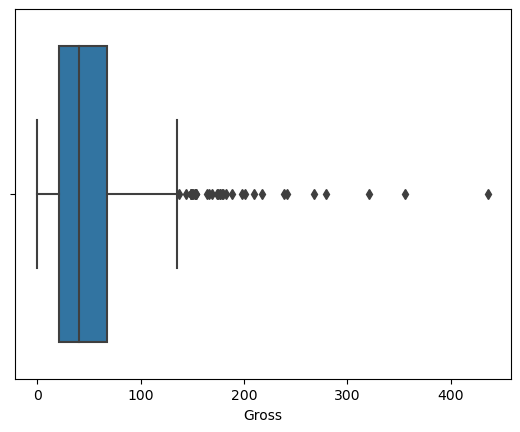

In [79]:
sns.boxplot(df_clean['Gross'])

In [ ]:
# We observe many outliers over the upper limit in Gross. So the standard deviation of the Gross is really high

C:\Users\Subhadra\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Rating'>

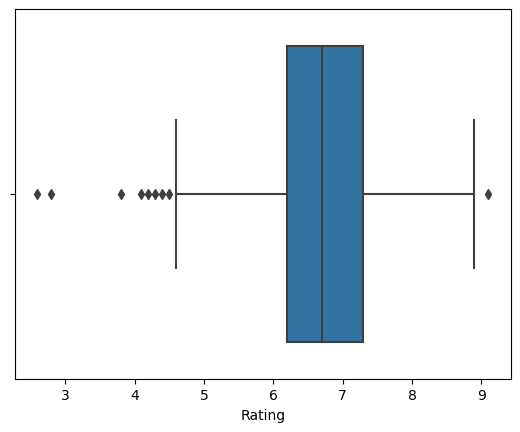

In [82]:
sns.boxplot(df_clean['Rating'])

In [ ]:
# We observe few outliers in Rating. So the standard deviation of the Rating is high

C:\Users\Subhadra\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Metascore'>

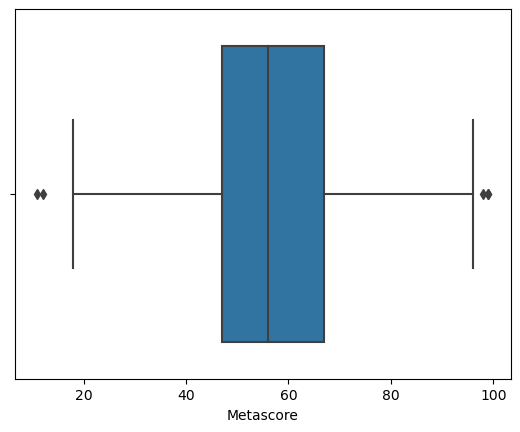

In [83]:
sns.boxplot(df_clean['Metascore'])

In [ ]:
# We observe very few outliers in Metascore. So the standard deviation of the Metascore is not too high

In [ ]:
# From the Box plots we see that there are lot of outliers in all the Numerical Data
# This mean the dispersion and disparity of the data is huge

# Univariant Analysis on Categorical Data
- Genre
- Certificate

In [64]:
# The data we scraped is Romance Comedy dramas based on Votes from imdb
# In this DataFrame under Categorical Data we have Certificate and Genre.
# Since we are only Analysing mainly Genre of Romance and Comedy we will see what more genre type people like to watch with Romance Comedy
# we will Analyze Certificate to which Certificate in Romance comedy more people like to watch
# We can use Bar Graph, Count Plot or Pie-Chart to analyze Certificate

In [64]:
df_clean["Genre"].value_counts()[0:5]

Comedy,Drama,Romance          177
Comedy,Romance                115
Animation,Adventure,Comedy     24
Comedy,Drama,Fantasy           24
Action,Adventure,Comedy        14
Name: Genre, dtype: int64

In [63]:
df_clean["Certificate"].value_counts()[0:5]

U        160
UA        95
A         74
R         62
PG-13     56
Name: Certificate, dtype: int64

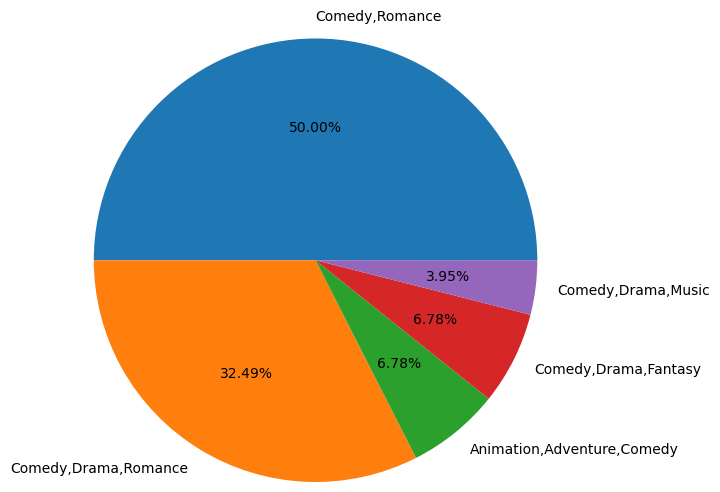

In [18]:
# Analyzing top 5 Genres using Pie-chart for the DataFrame
plt.pie(df_clean.Genre.value_counts()[0:5],autopct="%0.2f%%",labels=df_clean.Genre.unique()[0:5],radius=1.5)
plt.show()

In [ ]:
# We see from the pie-chart that "Comedy,Romance" and "Comedy,Drama,Romance" comprise most data more than 82%

<function matplotlib.pyplot.show(close=None, block=None)>

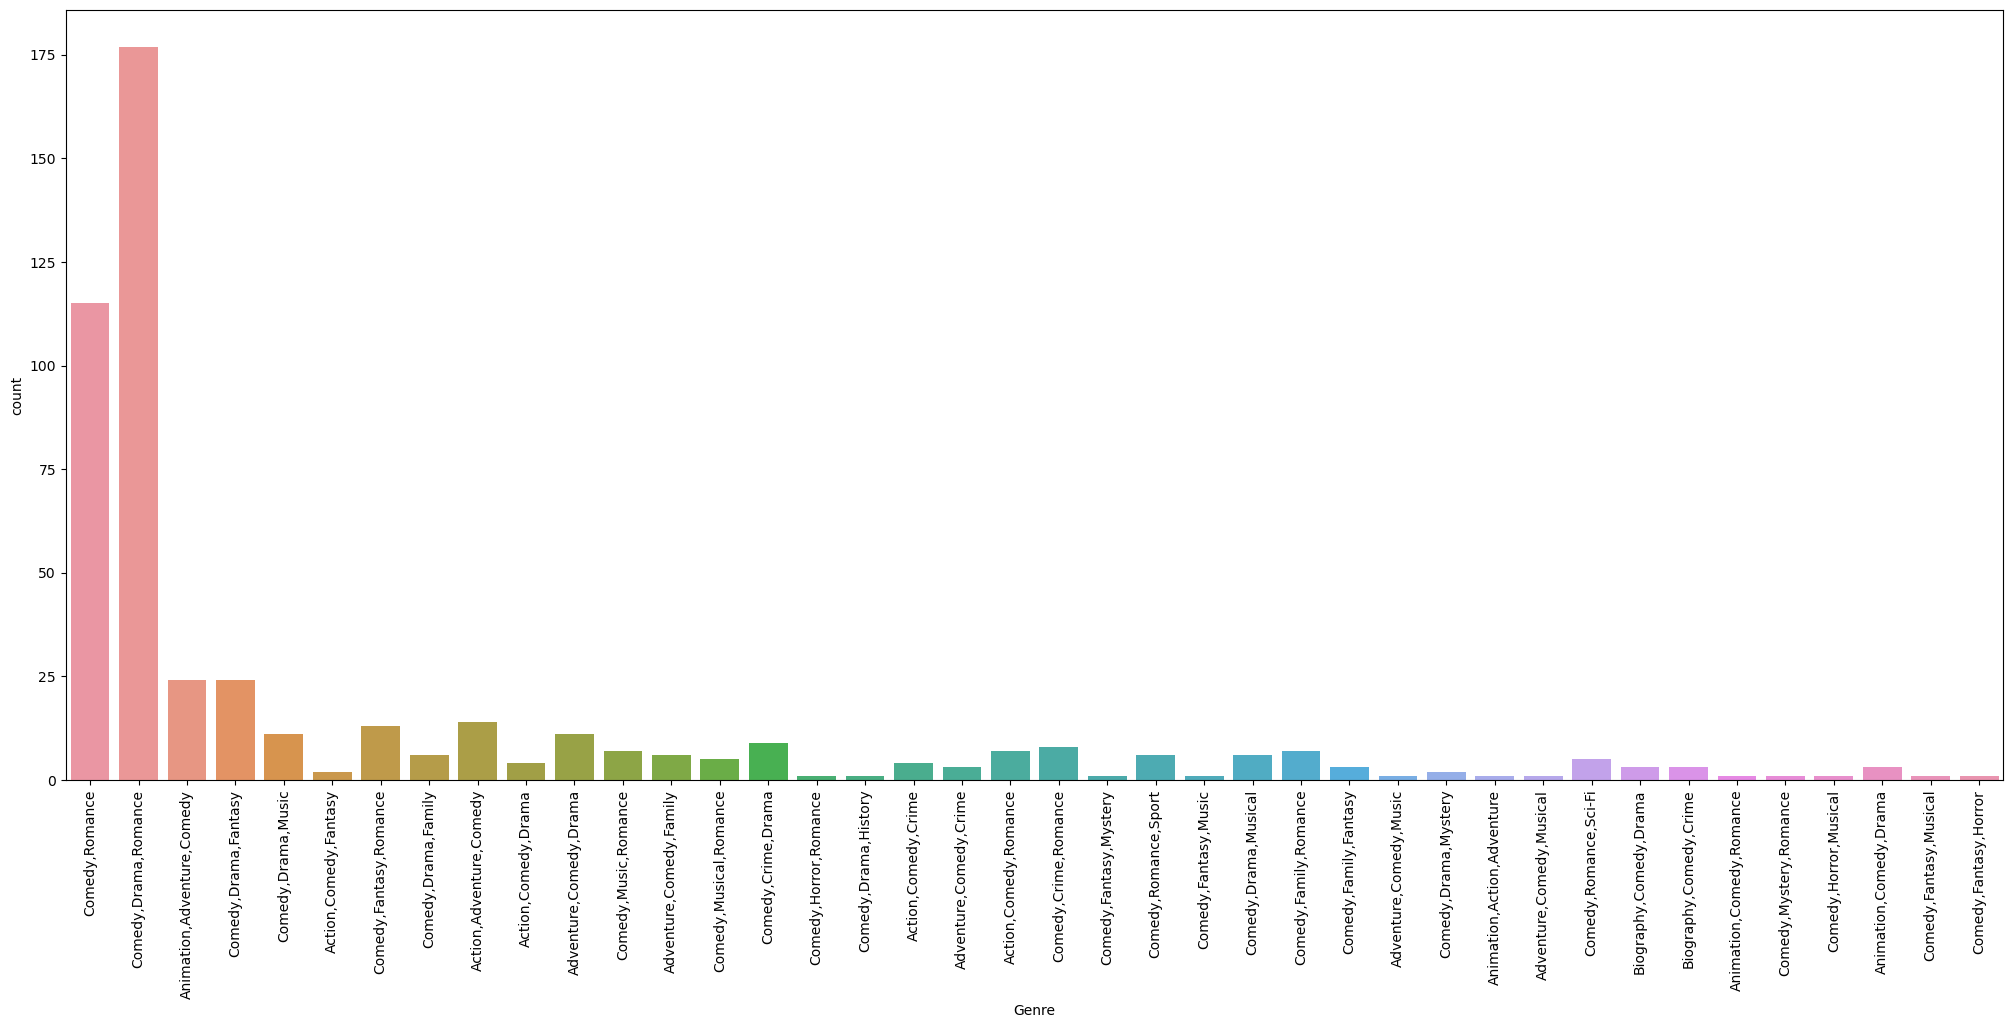

In [268]:
# count plot shows the exact count of drama for each Genre
plt.figure(figsize=(25,10))
sns.countplot(data=df_clean,x="Genre")
plt.xticks(rotation=90)
plt.show

In [ ]:
### We see that Other than Comedy Romance and Comedy Drama Romance none of the other genre have much presence 

C:\Users\Subhadra\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<function matplotlib.pyplot.show(close=None, block=None)>

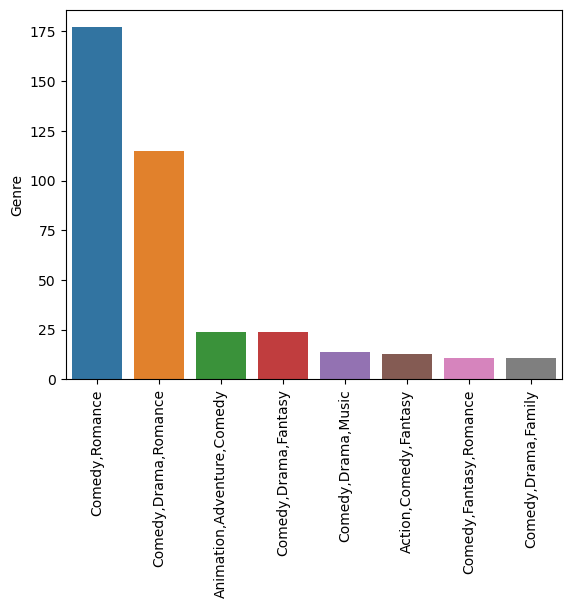

In [284]:
# Bar plot shows the exact count of drama for top 8 Genre
sns.barplot(df_clean["Genre"].unique()[0:8],df_clean["Genre"].value_counts()[0:8])
plt.xticks(rotation=90)
plt.show

In [ ]:
### We see that Other than Comedy Romance and Comedy Drama Romance none of the other genre have much presence so we understand
# that people appreciate mainly these 2 genres so new dramas need to focus on these dramas
# These 2 genres make more than 82% of dramas in the 500 data collected

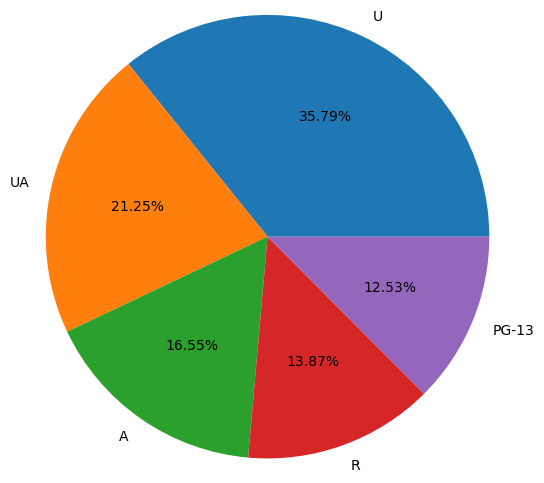

In [65]:
# Analyzing top 5 Certificates using Pie-chart for the DataFrame
plt.pie(df.Certificate.value_counts()[0:5],autopct="%0.2f%%",labels=["U","UA","A","R","PG-13"],radius=1.5)
plt.show()

In [ ]:
# In Romance Comedy most appreciated dramas are family friendly dramas (U,UA,PG-13 etc) compared to A or R or other certified ones
# Family friendly dramas comprise of more than 65% of dramas

<AxesSubplot:xlabel='Certificate', ylabel='count'>

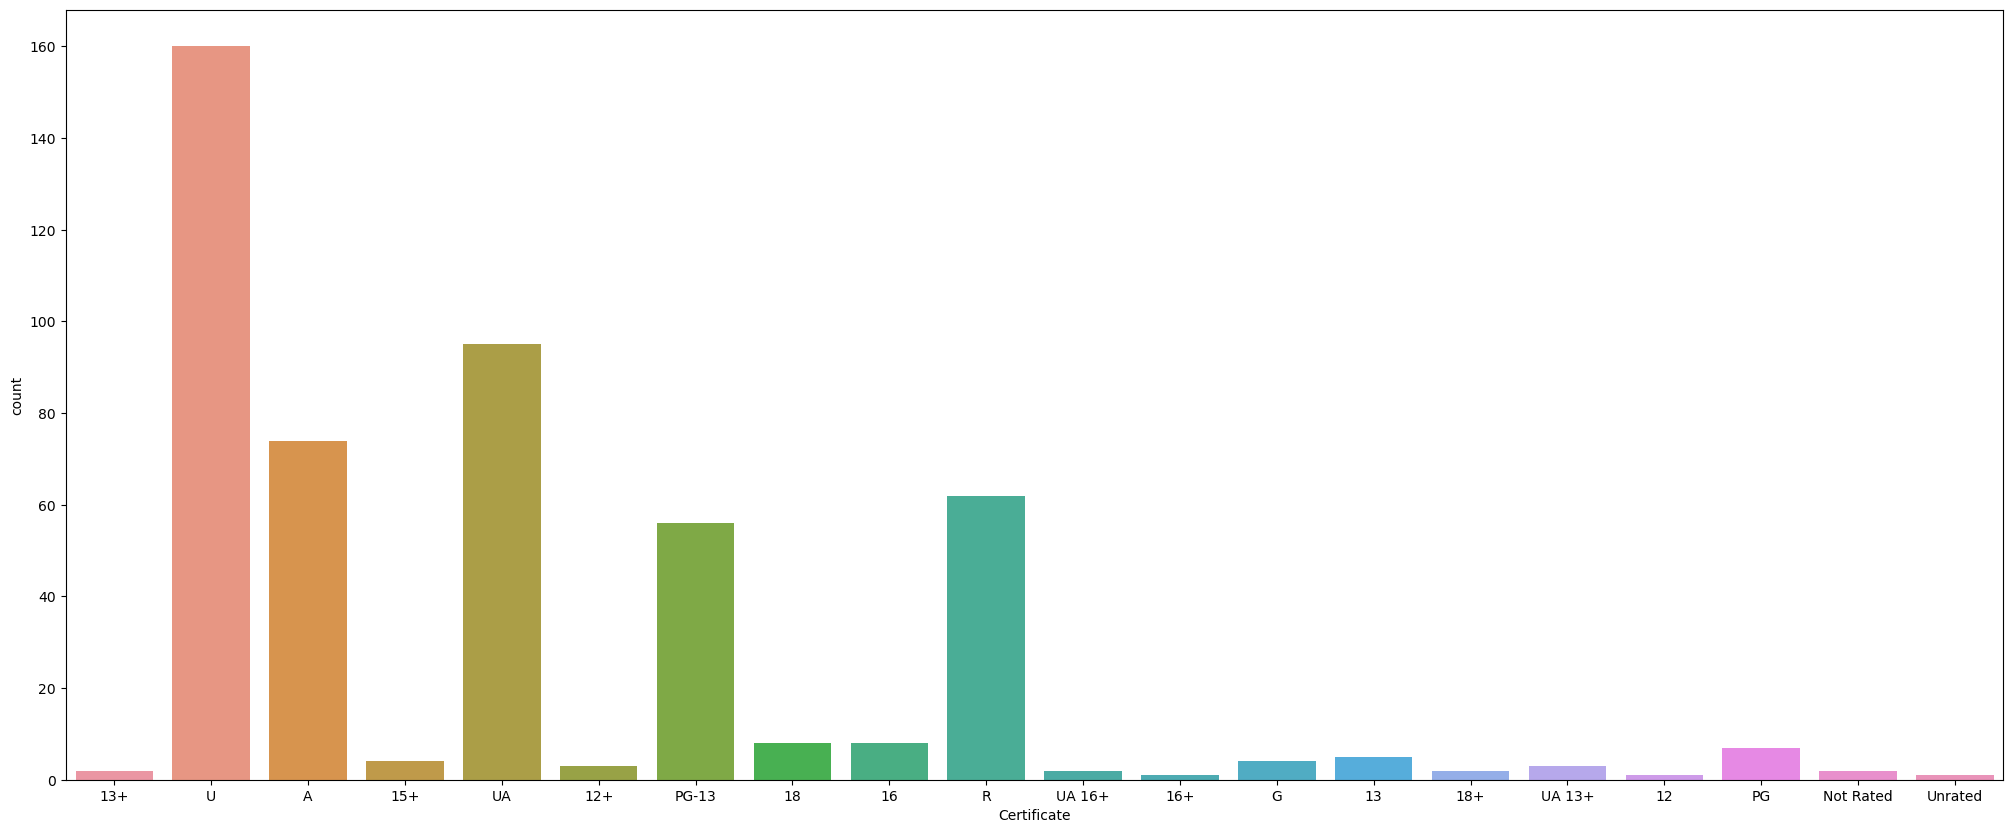

In [278]:
# count plot shows the exact count of drama for each certificate
plt.figure(figsize=(25,10))
sns.countplot(data=df_clean,x="Certificate")

C:\Users\Subhadra\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='Certificate'>

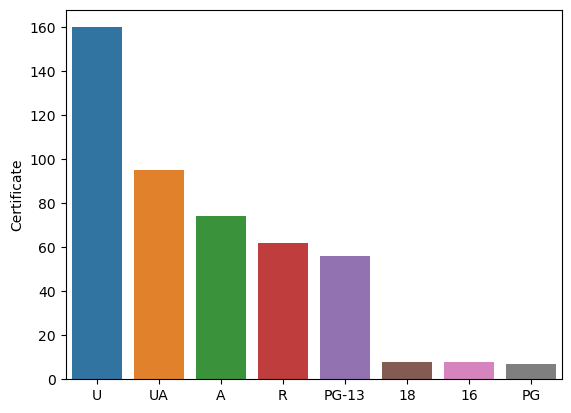

In [282]:
# Bar plot shows the exact count of drama for top 5 Certificate
sns.barplot(["U","UA","A","R","PG-13","18","16","PG"],df_clean["Certificate"].value_counts()[0:8])
plt.xticks(rotation=90)
plt.show

C:\Users\Subhadra\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='Certificate'>

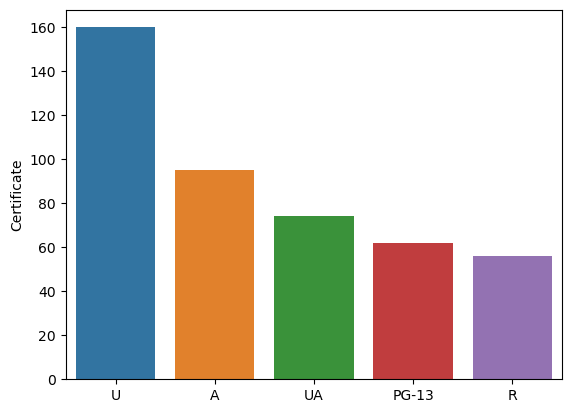

In [278]:
sns.barplot(df_trunc["Certificate"].unique(),df_trunc["Certificate"].value_counts())


In [ ]:
# Certification Analysis -
# From checking value_counts,
# From checking the Pie-Chart and count plot also we observe that
# In Romance Comedy most appreciated dramas are family friendly dramas (U,UA,PG-13 etc) compared to A or R or other certified ones

In [ ]:
# Genre Analysis -
# From checking the Value counts of the Genre we observe that when Drama Genre is added to Romance Comedy it is more popular

# UniVariant Analysis using distplot

C:\Users\Subhadra\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Rating', ylabel='Density'>

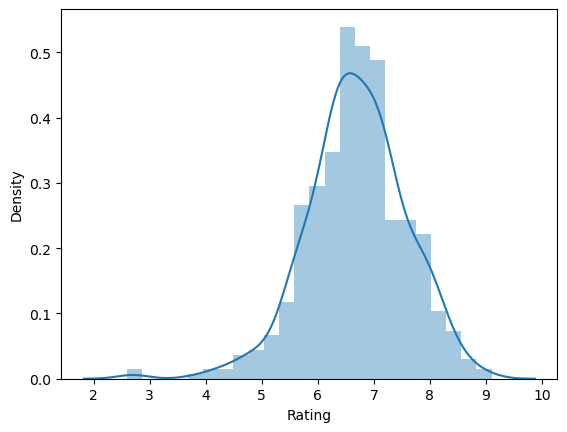

In [321]:
# We do Univariant Analysis on Rating which is given by the users
sns.distplot(df_clean["Rating"])

In [322]:
# Since the data we have chosen has maximum number of votes and 
# We observe that density of Rating between 6-8 is high, so most of ratings are above average
# So we can conclude that people tend to vote when they like a drama rather than when they dont like it

# Bi-Variant Analysis

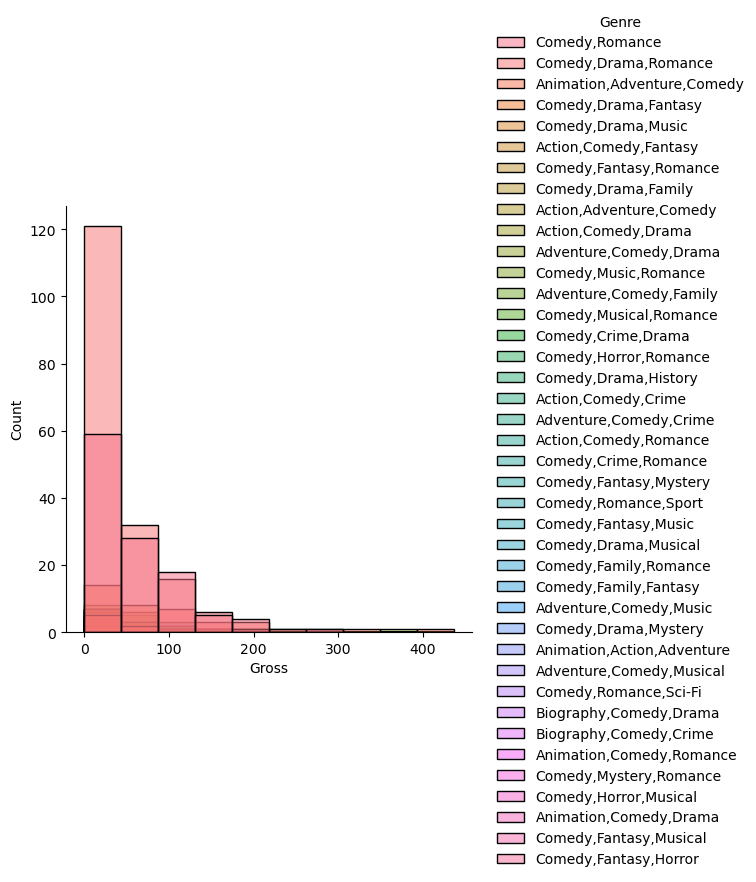

In [323]:
# We do Bivariant Analysis on Gross which is given by the users
sns.displot(data=df_clean,x="Gross",bins=10,hue="Genre")

In [ ]:
# Here we analyze Gross across the Genre and we clearly see that only Comedy Romance and Comedy Drama Romance have the count
# Since data collected is top 500 so most famous Genres are these

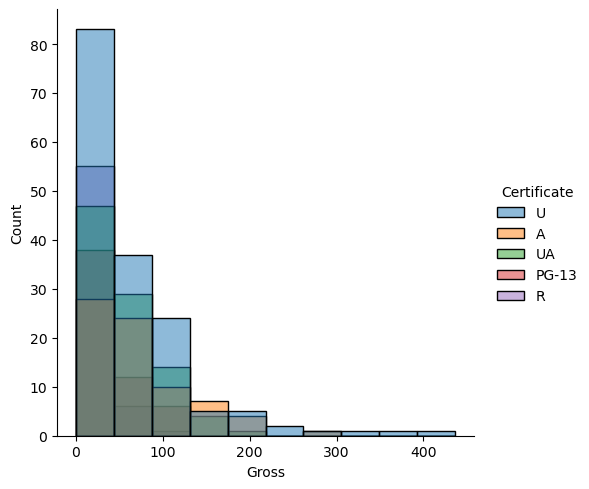

In [324]:
# We do Bivariant Analysis on Gross which is given by the users
sns.displot(data=df_trunc,x="Gross",bins=10,hue="Certificate")

In [ ]:
# In Romance Comedy most appreciated dramas are family friendly dramas (U,UA,PG-13 etc) compared to A or R or other certified ones
# So we can conclude that new dramas made should be Family friendly

# Correlation Analysis of all the features

<AxesSubplot:>

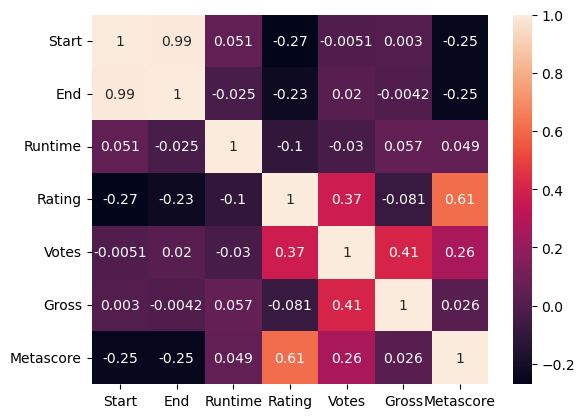

In [66]:
# We can create a heatmap to see color coded representation of individual values in that matrix
sns.heatmap(df_clean.corr(),annot=True)

# We see max correlation between
- Metascore vs Rating
- Gross vs Votes
- Votes vs Rating

In [ ]:
# Bi-Variant Analysis of Numerical Vs Numerical using Scatter plots 

<AxesSubplot:xlabel='Metascore', ylabel='Rating'>

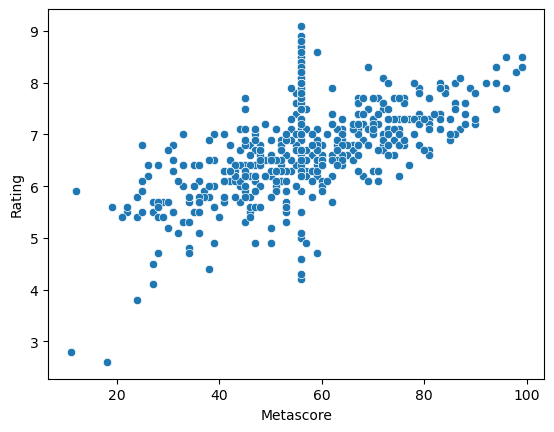

In [73]:
# Metascore vs Rating
sns.scatterplot(data=df_clean,x="Metascore",y="Rating")

In [ ]:
# We observe that there is a highly positive correlation between Metascore and Rating 
# This means that ratings by the users and critics are in sync for most cases

<AxesSubplot:xlabel='Gross', ylabel='Votes'>

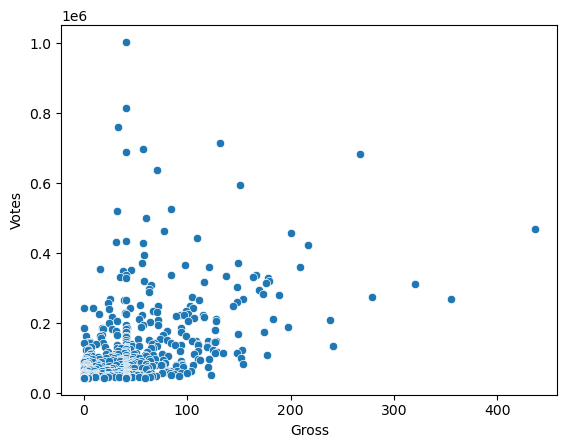

In [69]:
# Gross vs Votes
sns.scatterplot(data=df,x="Gross",y="Votes")

In [ ]:
# We see a slight positive correlation between Gross and Votes so we observe that the Gross of dramas is more when there are 
# more votes

<AxesSubplot:xlabel='Votes', ylabel='Rating'>

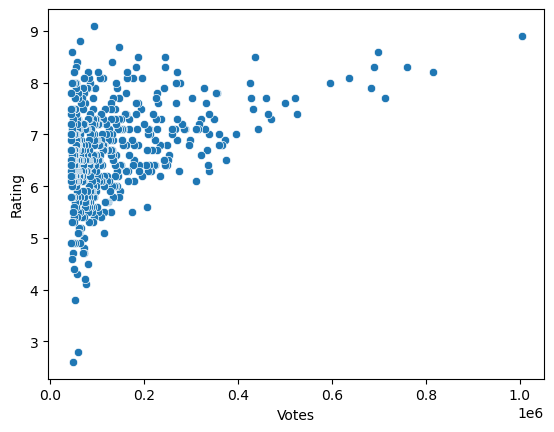

In [78]:
# Votes vs Rating
sns.scatterplot(data=df,x="Votes",y="Rating")

In [ ]:
# We see a slight positive correlation between Votes and Rating so we observe that the Rating of dramas is more when there are 
# more votes

C:\Users\Subhadra\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Certificate', ylabel='Gross'>

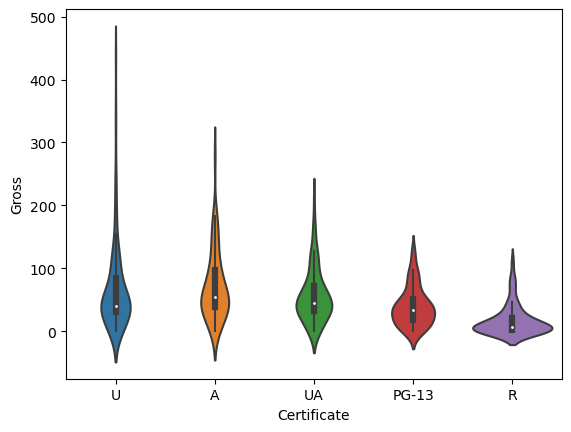

In [201]:
sns.violinplot(df_trunc['Certificate'],df_trunc['Gross'])

In [372]:
# Creating a DataFrame for the top 5 Genre's using Groupby and Concat
genre=df_trunc.groupby("Genre")
d_cr=genre.get_group("Comedy,Romance")
d_cdr=genre.get_group("Comedy,Drama,Romance")
d_cdf=genre.get_group('Comedy,Drama,Fantasy')
d_cdm=genre.get_group('Comedy,Drama,Music')
df_group=pd.concat([d_cr,d_cdr,d_cdf,d_cdm],ignore_index=True)
df_group

,Title,Start,End,Certificate,Runtime,Genre,Rating,Votes,Gross,Metascore,Director,Stars
0,The Big Bang Theory,2007,2019,U,22,"Comedy,Romance",8.2,814328,40.57,56,None,"Stars:Johnny Galecki, Jim Parsons, Kaley Cuoco..."
1,Le fabuleux destin d'Amélie Poulain,2001,2001,U,122,"Comedy,Romance",8.3,760481,33.23,69,Director:Jean-Pierre Jeunet,"Stars:Audrey Tautou, Mathieu Kassovitz, Rufus,..."
2,The 40 Year Old Virgin,2005,2005,UA,116,"Comedy,Romance",7.1,442711,109.45,73,Director:Judd Apatow,"Stars:Steve Carell, Catherine Keener, Paul Rud..."
3,Friends with Benefits,2011,2011,A,109,"Comedy,Romance",6.5,373467,55.80,63,Director:Will Gluck,"Stars:Mila Kunis, Justin Timberlake, Patricia ..."
4,Yes Man,2008,2008,PG-13,104,"Comedy,Romance",6.8,366490,97.69,46,Director:Peyton Reed,"Stars:Jim Carrey, Zooey Deschanel, Bradley Coo..."
...,...,...,...,...,...,...,...,...,...,...,...,...
286,Youth,2015,2015,R,124,"Comedy,Drama,Music",7.3,79755,2.70,64,Director:Paolo Sorrentino,"Stars:Michael Caine, Harvey Keitel, Rachel Wei..."
287,Empire Records,1995,1995,UA,90,"Comedy,Drama,Music",6.7,57252,0.30,30,Director:Allan Moyle,"Stars:Anthony LaPaglia, Debi Mazar, Maxwell Ca..."
288,Footloose,2011,2011,U,113,"Comedy,Drama,Music",5.8,50822,51.80,58,Director:Craig Brewer,"Stars:Kenny Wormald, Julianne Hough, Dennis Qu..."
289,Rab Ne Bana Di Jodi,2008,2008,U,167,"Comedy,Drama,Music",7.2,49354,2.07,56,Director:Aditya Chopra,"Stars:Shah Rukh Khan, Anushka Sharma, Vinay Pa..."


In [383]:
# We will Analyze using crosstab the count of popular Genre vs popular Certificate
pd.crosstab(df_group.Certificate,df_group.Genre,margins=True,margins_name="Total")

Genre,"Comedy,Drama,Fantasy","Comedy,Drama,Music","Comedy,Drama,Romance","Comedy,Romance",Total
Certificate,,,,,
A,3,2,28,26,59
PG-13,3,3,19,11,36
R,5,2,30,7,44
U,5,2,45,24,76
UA,6,2,37,31,76
Total,22,11,159,99,291


In [ ]:
# We observe that the count is high for "Comedy,Drama,Romance" "Comedy,Romance" in Genre and "U" and "UA" in Certificate

In [ ]:
# Now let us observe Votes for Top Genre and Top Certificates using Pivot Table

In [378]:
# Creating a Pivot_table of Top Genre vs Top Certificate and we view the votes
df_group.pivot_table(index="Genre",columns="Certificate",values="Votes")

Certificate,A,PG-13,R,U,UA
Genre,,,,,
"Comedy,Drama,Fantasy",191206.333333,139450.666667,90997.600000,219888.600000,112937.166667
"Comedy,Drama,Music",376933.000000,78913.000000,131043.000000,50088.000000,86941.500000
"Comedy,Drama,Romance",207032.607143,75458.105263,94415.666667,127990.733333,129236.783784
"Comedy,Romance",163267.615385,88501.363636,65402.285714,163503.125000,141397.161290


In [ ]:
# We observe that the votes are good across all the Popular Genre and Certificate, but since the count of Dramas from previous
# table is more for "Comedy,Drama,Romance" & "Comedy,Romance" and Certificate "U", "UA" and "PG-13"
# We can conclude that this combination is the most popular

# Numerical vs Categorical Analysis

<function matplotlib.pyplot.show(close=None, block=None)>

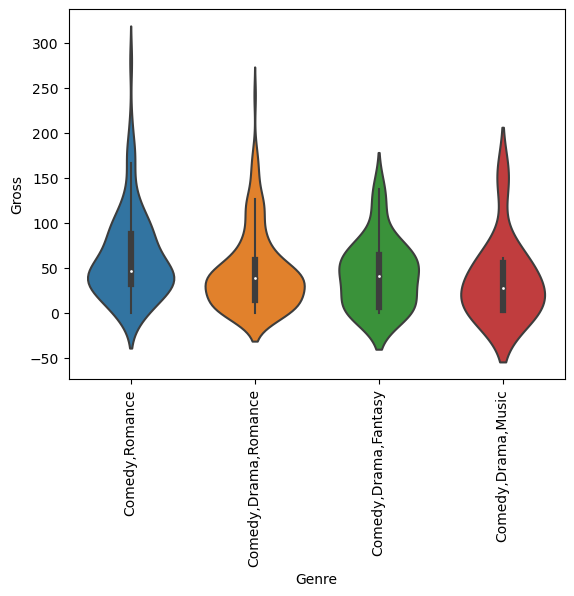

In [389]:
# We Analyze Genre Vs Gross
sns.violinplot(data=df_group,x="Genre",y="Gross")
plt.xticks(rotation=90)
plt.show

C:\Users\Subhadra\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 13.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Subhadra\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 27.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='Certificate', ylabel='Gross'>

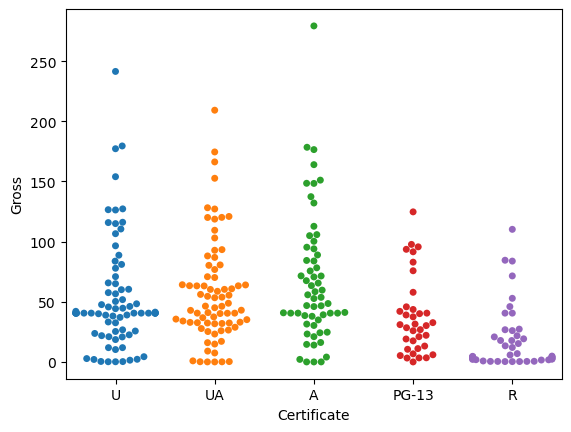

In [390]:
sns.swarmplot(data=df_group,x="Certificate",y="Gross")

C:\Users\Subhadra\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 13.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<function matplotlib.pyplot.show(close=None, block=None)>

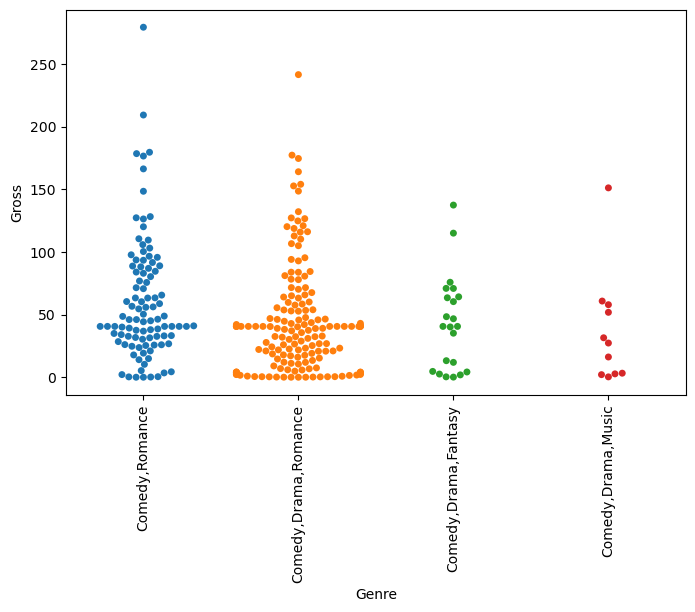

In [391]:
plt.figure(figsize=(8,5))
sns.swarmplot(data=df_group,x="Genre",y="Gross")
plt.xticks(rotation=90)
plt.show

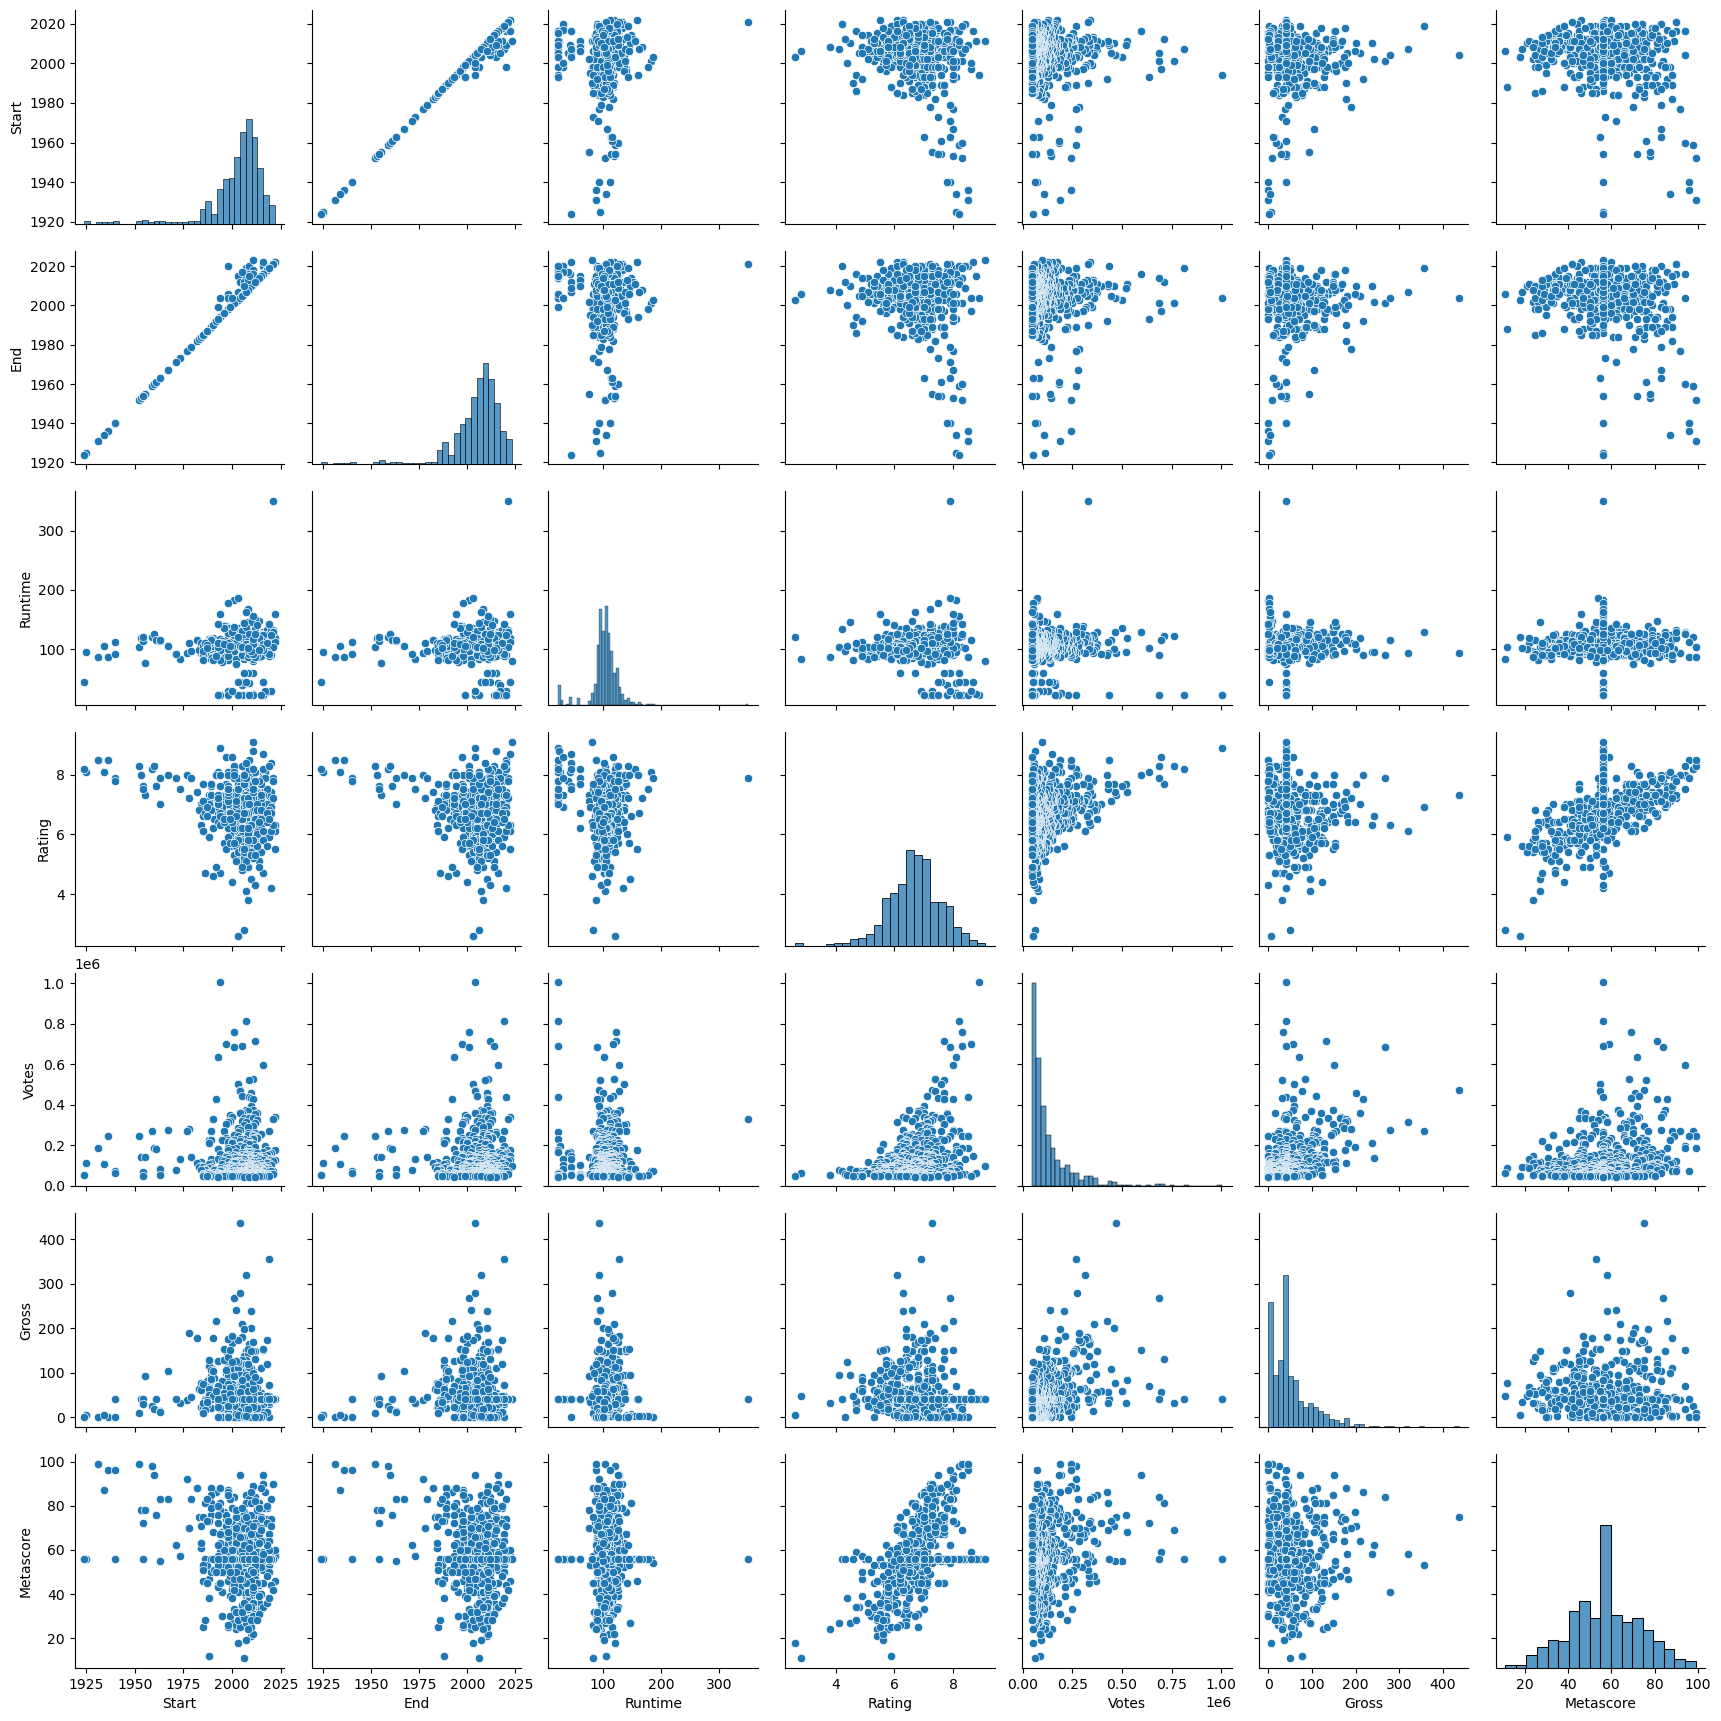

In [392]:
# We will analyse all the features in a single frame using pairplot
sns.pairplot(df_clean)

# Final Conclusion:
- In the given data most popular genre is "Comedy,Romance" and "Comedy,Drama,Romance"
- In the given data most popular Certificate is ["U","UA","PG-13"]
- For future productions in Dramas the best bet is "Comedy,Romance" and "Comedy,Drama,Romance" with Family Certifications. 
- These will have maximum Rating and Metascore also most votes (so highest positive viewership)    